In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
X,y = datasets.make_moons()

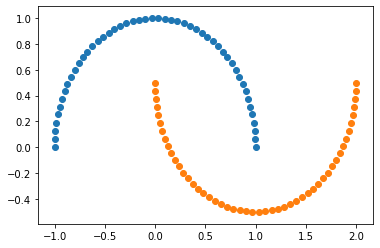

In [15]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [16]:
# 设置一个0.15的数据噪音
X,y = datasets.make_moons(noise=0.15,random_state=666)

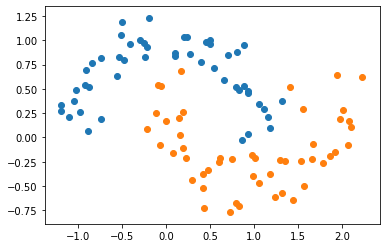

In [17]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

## 使用多项式特征的SVM

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("Stand", StandardScaler()),
        ("svc", LinearSVC(C=C))
    ])

In [19]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [20]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)

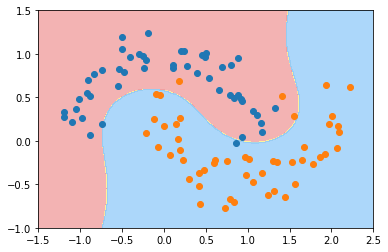

In [21]:
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

## 尝试使用多项式核函数的SVM

In [22]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=1e8):
    return Pipeline([
        ("stand",StandardScaler()),
        ("kernelSVC",SVC(kernel="poly",degree=degree,C=C))
    ])

In [23]:
kernel_svc = PolynomialKernelSVC(degree=3)
kernel_svc.fit(X,y)

Pipeline(memory=None,
         steps=[('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=100000000.0, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

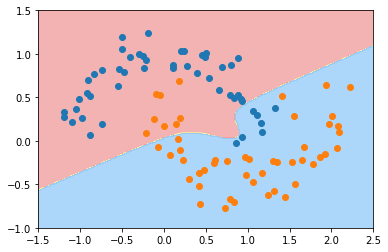

In [24]:
plot_decision_boundary(kernel_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()